# Introducción

La [superresolución](https://youtu.be/I_8ZH1Ggjk0) es un proceso utilizado para aumentar el tamaño de una imagen, para lo cual se requiere la interpolación de píxeles nuevos. Las técnicas clásicas de procesado de imagen, por ejemplo, las utilizadas en "Photoshop", "GIMP" o "Image Magick", no suelen dar buenos resultados cuando el aumento del tamaño es muy grande. La nueva imagen aparece pixelada, borrosa, con artefactos y con un aspecto visual poco satisfactorio, como se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/opencv_super_resolution_bicubic.png" width="500" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de ampliación de una ROI (rectángulo rojo) con técnicas tradicionales, interpolación bicúbica.
</center></figcaption>
</figure>

Al aumentar la escala de la imagen aparecen nuevos píxeles, cuyo valor es necesario calcular. El cálculo utilizado por los métodos clásicos se basa en técnicas de "interpolación", las cuales utilizan la información local de los píxeles antiguos más próximos (vecinos más próximos). Sin embargo, las técnicas basadas en **deep learning** utilizan la información de un entorno más amplio a través del proceso de extracción de características, utilizando bloques convolucionales similares a los que utilizamos en clasificación de imagen. Las técnicas basadas en **deep learning**, y más recientemente las redes neuronales tipo "Generative Adversarial Network" (**GANs**) proporcionan resultados mucho mejores, como se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/opencv_super_resolution_dl-558x1024.png" width="500" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de ampliación de la ROI anterior (rectángulo rojo) con técnicas tradicionales y con técnicas basadas en deep learning.
</center></figcaption>
</figure>

# Técnicas tradicionales

Las técnicas tradicionales para la interpolación o el re-escalado de una imagen consisten en aumentar el tamaño de la matriz (o las matrices) que definen la imagen. Para ello, en primer lugar se implementa un proceso denominado "up-sampling", el cual aumenta las dimensiones de la matriz al tamaño deseado mediante la introducción de ceros entre píxeles consecutivos. Posteriormente es necesario dar valores a los ceros introducidos, y para ello existen diferentes estrategias. El método más simple es el método de vecinos cercanos, que consiste en dar a cada nuevo píxel el valor del píxel conocido más cercano, tal y como se puede ver en el siguiente vídeo. 

<figure style="padding: 1em;"><center>
<video width="600" controls src="data_m4/figs/vecinos_cercanos.mp4" /></center>
<figcaption style="textalign: center; font-style: italic"><center>Interpolación mediante el método del vecino más cercano.
</center></figcaption>
</figure>

Otra opción es utilizar una interpolación lineal entre píxeles vecinos para obtener el valor de los píxeles nuevos (en las dos dimensiones). Esta estrategia se llama interpolación bilineal, ya que se realiza en las dos dimensiones. En el siguiente vídeo se puede ver un ejemplo.

<figure style="padding: 1em;"><center>
<video width="600" controls src="data_m4/figs/bilineal.mp4" /></center>
<figcaption style="textalign: center; font-style: italic"><center>Interpolación bilineal, el valor de cada píxel se obtiene por aproximación lineal entre vecinos.
</center></figcaption>
</figure>

Finalmente, la estrategia más utilizada es la interpolación bicúbica, en la cual el ajuste entre píxeles vecinos se realiza mediante un polinomio cúbico en las dos dimensiones. Un esquema de las diferentes estrategias de aproximación entre píxeles vecinos se puede ver en la siguiente figura, donde se utilizan los píxeles originales para definir los píxeles situados en puntos intermedios. 

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/Comparison_of_1D_and_2D_interpolation.png" width="500" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de las diferentes técnicas de interpolación para la interpolación de imágenes.
</center></figcaption>
</figure>

Como se puede ver en la figura, el tamaño de la vecindad considerada para el cálculo de los píxeles es diferente en cada caso. En el caso del vecino más próximo solo necesitamos la información de un píxel para replicarla en los nuevos píxeles. En el caso de la interpolación bilineal necesitamos una vecindad de $2 \times 2$ para poder definir una recta en cada dirección. Finalmente, en el caso bicúbico necesitamos la información de $4 \times 4$ vecinos para definir un polinomio de grado 3.

# Técnicas basadas en **deep learning**

El planteamiento del problema consiste en diseñar una red neuronal cuyas entradas son imágenes con baja resolución y las salidas son imágenes con alta resolución. Para realizar el aprendizaje de la red es necesario generar una base de datos, que en este caso es un proceso muy sencillo de obtener. Si tenemos un **dataset** de imágenes de alta resolución, éstas se pueden configurar directamente como la salida de la red. La versión de baja resolución se puede obtener sin más que realizar un diezmado (o **downsampling**), y esto será la entrada. Hay muchas configuraciones de redes neuronales utilizadas para la implementación de superresolución, y todas ellas contemplan un paso de **upsampling** o interpolación, que es similar a la interpolación clásica, la cual es refinada en diferentes pasos mediante el entrenamiento de la red. 

En una red convolucional los bloques convolucionales típicamente generan una salida (o mapa de características) que tiene dimensiones más reducidas que la entrada. Por ejemplo, en la siguiente figura tenemos una entrada de $5 \times 5$ convolucionada con un **kernel** de $3 \times 3$, que genera una salida de $3 \times 3$. Según vimos, para evitar la reducción de las dimensiones de la salida, se realiza un **zero padding** sobre la entrada (`padding=same`).

<figure>
<center><img src="https://i.imgur.com/LueNK6b.gif" width=200 alt="">
<figcaption style="textalign: center; font-style: italic">Ejemplo de convolución.</center></figcaption>
</figure>

En el caso de la superresolución se requiere un proceso de aumento de las dimensiones de la entrada, que también se denomina interpolación o **upsampling**. Para ello, las redes neuronales convolucionales incorporan dos soluciones, la **convolución transpuesta** o **deconvolución** y un tipo nuevo de capa denominada "capa subpixel" (**subpixel layer**). 

- La **convolución transpuesta** o **deconvolución** es una simple convolución que se realiza sobre una entrada que ha sido sometida a un **zero padding** y a un proceso de **upsampling**. El efecto neto de las tres operaciones es un aumento en las dimensiones de la matriz, tal y como se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/conv_transpuesta.jpeg" width="600" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de **convolución transpuesta**.
</center></figcaption>
</figure>

- La **capa subpixel** (**subpixel layer**) es una estrategia que consiste en realizar una pila de convoluciones sobre la entrada, donde cada convolución genera una salida diferente de la entrada. Finalmente se construye una matriz más grande donde se incorporan todas los elementos de la pila de convoluciones, esta operación se denomina **pixel shuffle**. Un ejemplo se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/subpixel_layer.jpeg" width="600" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de **subpixel layer**.
</center></figcaption>
</figure>

## Clasificación de las estrategias

Un modo de clasificar este tipo de redes neuronales es según la posición que ocupe la operación de interpolación a lo largo de la red. Si la interpolación se realiza al principio de la red, el resto de la red tiene que refinar el resultado hasta obtener la imagen de alta resolución. El inconveniente, en este caso, es que todas las operaciones de "refinamiento" se realizan a máxima resolución. Un ejemplo puede verse en la siguiente figura.

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/pre-interpolacion.png" width="400" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de red neuronal donde la interpolación se realiza al principio.
</center></figcaption>
</figure>

La segunda opción consiste en realizar el proceso de interpolación al final de la red. Esta aproximación suele ser más eficiente computacionalmente, pero es más difícil de entrenar, sobre todo para aumentos grandes de la resolución. Un ejemplo de la estructura se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/post-interpolacion.png" width="400" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de red neuronal donde la interpolación se realiza al final.
</center></figcaption>
</figure>

Una situación intermedia se puede obtener realizando un aumento de la resolución progresivo, en diferentes etapas, como se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/progresive-interpolacion.png" width="400" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Ejemplo de red neuronal donde la interpolación se realiza de forma progresiva.
</center></figcaption>
</figure>

# Super resolución en **OpenCV**

**OpenCV** típicamente ha utilizado las técnicas clásicas para aumentar el tamaño de la imagen, sin embargo, recientemente ha incorporado una selección de cuatro algoritmos de **deep learning** para el escalado de imágenes. En esta práctica se revisarán los algoritmos y analizaremos los resultados comparativamente con el método clásico,  el cual se basa en interpolación bicúbica. Los cuatro métodos que discutiremos son:

- [Enhanced deep super-resolution network (EDSR)](https://arxiv.org/pdf/1707.02921.pdf)
- [Efficient sub-pixel convolutional neural network (ESPCN)](https://arxiv.org/pdf/1609.05158.pdf)
- [Paper Fast Super-Resolution Convolutional Neural Networks (FSRCNN)](https://arxiv.org/pdf/1608.00367.pdf)
- [Laplacian Pyramid Super-Resolution Network (LapSRN)](https://arxiv.org/pdf/1710.01992.pdf)

Los tres primeros algoritmos permiten una relación de escalado de 2, 3 y 4 veces, mientras que el último tiene 2, 4 y 8 veces el tamaño original. Para utilizar los modelos de superresolución necesitamos utilizar funcionalidades adicionales al módulo estándar de **OpenCV**, que se encuentran en el módulo **opencv-contrib**. En la siguiente celda instalamos el módulo **opencv-contrib**, si no tiene instalado este módulo descomente esta celda:

In [1]:
# !pip3 install --upgrade --quiet opencv-python opencv-contrib-python

: 

: 

Asegúrese de reinicial el kernel, la siguiente celda lo hace automáticamente:

In [ ]:
import os
os._exit(00)

A continuación importamos las librerías necesarias:

In [1]:
import cv2
import matplotlib.pyplot as plt

y cargamos la imagen sobre la que vamos a realizar las pruebas. 

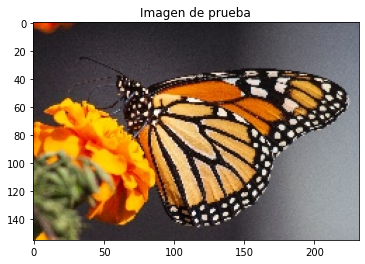

In [2]:
# Read image
img = cv2.imread("data_m4/figs/sample1.png")
plt.imshow(img[:,:,::-1]), plt.title('Imagen de prueba'), plt.show();

Para poder comparar los algoritmos mencionados anteriormente, utilizaremos una región de interés para ver más claramente las capacidades de los métodos. En la siguiente celda extraemos una **ROI** arbitraria, la cual puede cambiar a su gusto:

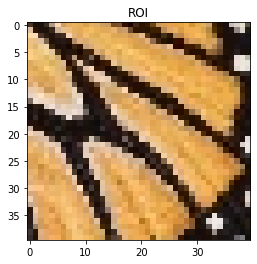

In [3]:
# Cropout OpenCV logo
img = cv2.imread("data_m4/figs/sample1.png")
img = img[80:120,120:160]
plt.figure(figsize = (4,4))
plt.imshow(img[:,:,::-1], aspect='auto'), plt.title('ROI'), plt.show();

## Enhanced deep super-resolution network (EDSR)

Un esquema de la red utilizada se puede ver en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/edsr.png" width="400" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Esquema de red EDSR.
</center></figcaption>
</figure>

Se utiliza una arquitectura con conexiones de salto, denominados **"Residual Blocks"**, `ResBlock`. Son bloques con una base convolucional, donde una parte de la información fluye a través de las capas de convolución y una rama permite saltarse dichos bloques. Al final se suman las dos componentes y de ese modo evitamos la pérdida de información a lo largo de las capas convolucionales. Para mejorar la precisión de la red se pueden añadir varios bloques residuales, lo cual mejora la precisión, pero puede comprometer la estabilidad del entrenamiento. En vez resolver este problema con capas de de **"bath normalization"**, lo que se hace es incorporar una capa con un factor de escala de 0.1 en cada bloque residual, que es la capa verde denominada "Mult". Como se puede ver en la figura, la etapa de interpolación se produce al final, en la estructura denominada **upsample**. El **upsample** se realiza mediante una estructura de **subpixel layer**, a través de un bloque convolucional seguido de la operación **shuffle**. La arquitectura tiene tres opciones, o bien se configura con un factor de ampliación de 2, 3 o 4. Inicialmente, la arquitectura se entrena con un factor de escala de 2. Posteriormente estos pesos preentrenados se utilizan para entrenar los módulos de escalado con factores de 3 y 4. Esto no sólo acelera el entrenamiento, sino que también mejora el rendimiento de los modelos. En la celda siguiente se muestra una comparación del resultado de superresolución 4x del método **EDSR**, el método de interpolación bicúbica y la imagen original.

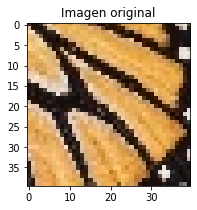

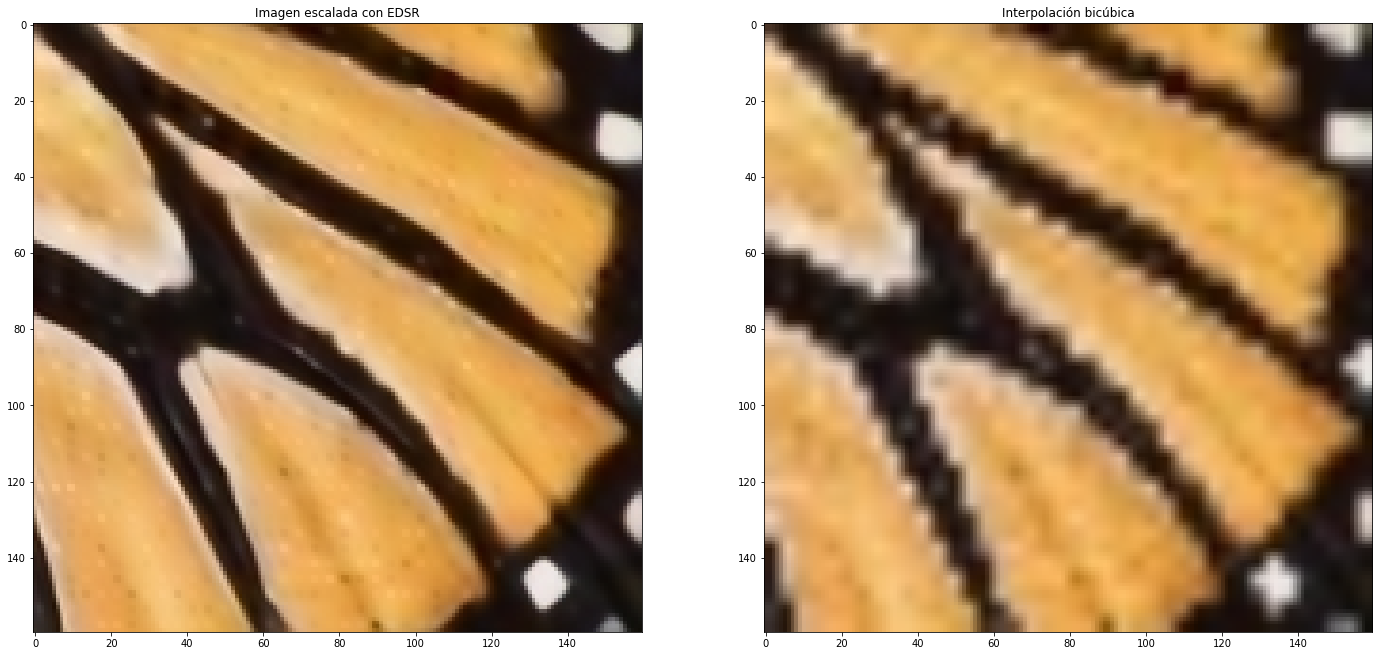

In [4]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "data_m4/models/EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4)
result = sr.upsample(img)
# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)
# Original image
plt.figure(figsize=(3,3))
plt.imshow(img[:,:,::-1]), plt.title('Imagen original')
# Scaled images
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
# SR upscaled
plt.imshow(result[:,:,::-1]), plt.title('Imagen escalada con EDSR')
plt.subplot(1,2,2)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1]), plt.title('Interpolación bicúbica')
plt.show()

## Efficient sub-pixel convolutional neural network (ESPCN)

En esta aproximación se extraen mapas de características en baja resolución mediante una sucesión de bloques convolucionales y finalmente se utiliza una capa de convolución subpixel para obtener el resultado, un esquema se puede ver en la siguiente figura. 

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/espcn.jpeg" width="1200" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Esquema de red ESPCN.
</center></figcaption>
</figure>

La interpolación se realiza al final de la red, por tanto las operaciones complejas tienen lugar con dimensión reducida, dando lugar a una estructura de las más simples y eficaces desde el punto de vista computacional. Una consideración interesante es que en esta estructura, y para esta aplicación, la función de activación `Tanh` funciona mucho mejor que la función `ReLu`. La celda siguiente muestra una comparación del resultado de superresolución 3x del método ESPCN, del método de interpolación bicúbica y de la imagen original.

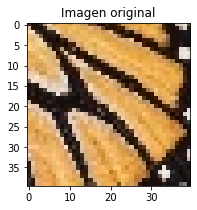

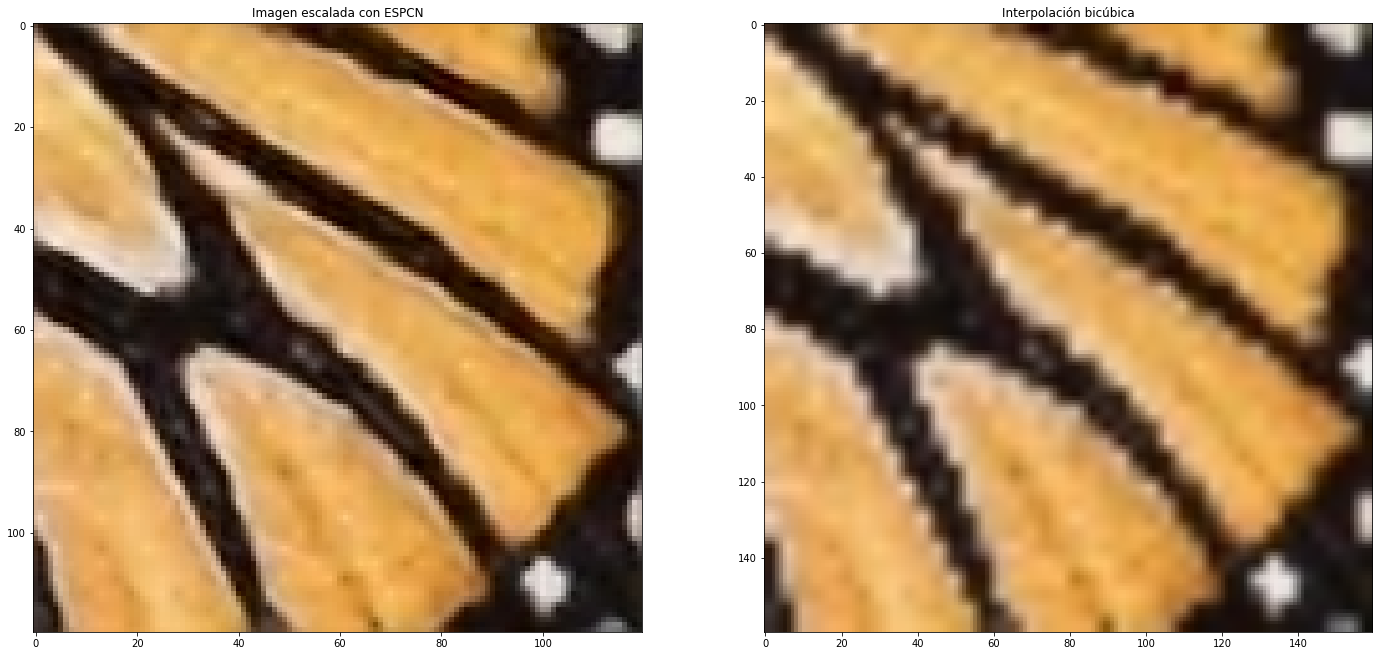

In [5]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "data_m4/models/ESPCN_x3.pb"
sr.readModel(path)
sr.setModel("espcn",3)
result = sr.upsample(img)
# Original image
plt.figure(figsize=(3,3))
plt.imshow(img[:,:,::-1]), plt.title('Imagen original')
# Scaled images
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
# SR upscaled
plt.imshow(result[:,:,::-1]), plt.title('Imagen escalada con ESPCN')
plt.subplot(1,2,2)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1]), plt.title('Interpolación bicúbica')
plt.show()

## Fast Super-Resolution Convolutional Neural Networks, FSRCNN

FSRCN es una versión mejorada de su antecesora SRCNN, con la diferencia fundamental de que la interpolación se produce al final, utilizando un bloque de **deconvolución** o convolución transpuesta. Un esquema de las dos arquitecturas es:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/fsrcnn.png" width="1000" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Esquema de red FSRCN.
</center></figcaption>
</figure>

FSRCNN y ESPCN están basados en conceptos muy similares, bloques convolucionales que generan mapas de características similares. En el caso de FSRCNN, la primera etapa reduce la dimensión de la entrada y a partir de ahí se trabaja con mapas de características. Se utilizan tamaños de filtro relativamente pequeños, antes de realizar finalmente la interpolación mediante capas de **deconvolución**. Esto hace que el modelo sea relativamente pequeño y rápido. La arquitectura comienza con una sucesión de diferentes bloques convolucionales que reducen sistemáticamente la dimensión. Después hay una etapa no lineal (**Mapping**), a base de capas convoluciones de $3\times 3$ repetidas $m$ veces. Finalmente se produce la expansión con un bloque de **deconvolución**. Para la función de activación se utilizó una modificación de **ReLu**, que se denomina **Parametric ReLU** (**PReLu**). Como se puede ver en la siguiente figura, la región izquierda de la función de activación **PReLu** es una función lineal con una pendiente que es un parámetro entrenable.

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/PReLu.jpg" width="500" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Función de activación **ReLu** y **PReLu**.
</center></figcaption>
</figure>

La celda siguiente muestra una comparación del método FSRCNN con aumento de resolución en un factor 3x, con el método de interpolación bicúbica y la imagen original.

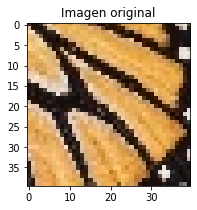

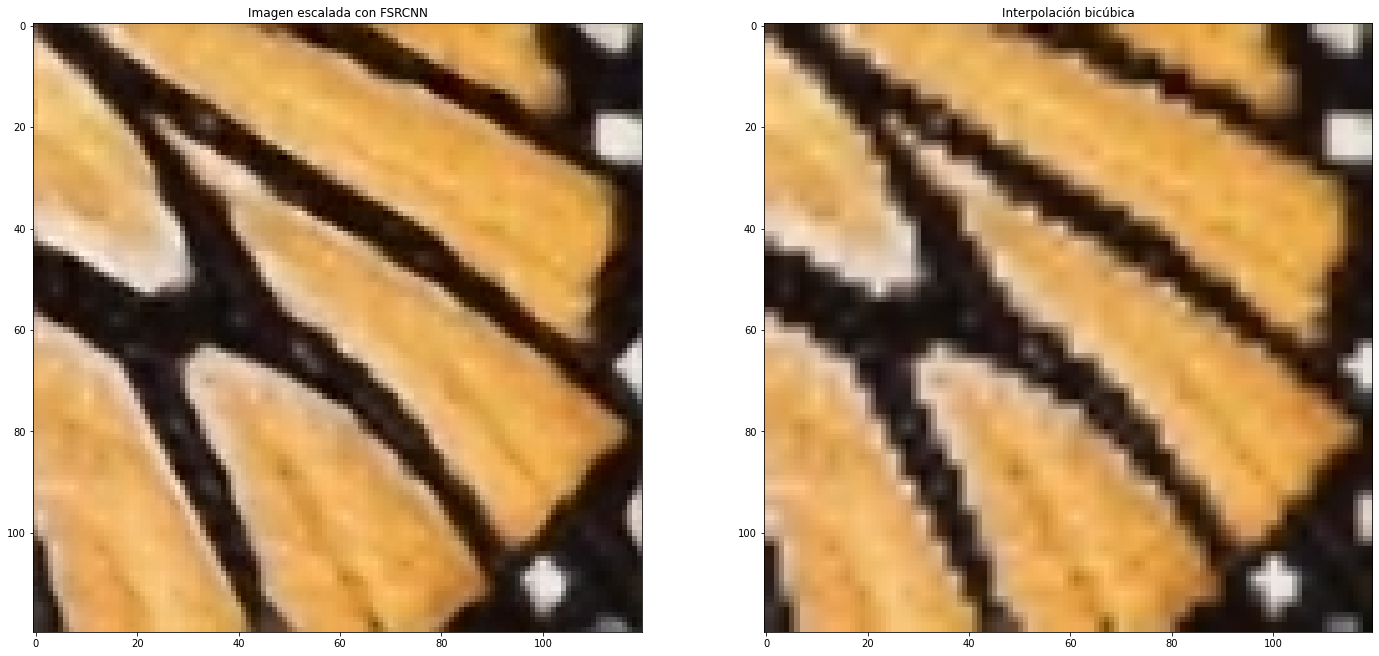

In [6]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "data_m4/models/FSRCNN_x3.pb"
sr.readModel(path)
sr.setModel("fsrcnn",3)
result = sr.upsample(img)
# Resized image
resized = cv2.resize(img,dsize=None,fx=3,fy=3)
# Original image
plt.figure(figsize=(3,3))
plt.imshow(img[:,:,::-1]), plt.title('Imagen original')
# Scaled images
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
# SR upscaled
plt.imshow(result[:,:,::-1]), plt.title('Imagen escalada con FSRCNN')
plt.subplot(1,2,2)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1]), plt.title('Interpolación bicúbica')
plt.show()

## Laplacian Pyramid Super-Resolution Network, LapSRN

LapSRN es una situación intermedia entre las estrategias que aumentan la escala al principio y las que lo hacen al final. Propone aumentar la escala de forma progresiva hasta el final. Un esquema de la estructura de la red se muestra en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/lapsrn.png" width="500" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Esquema de red LAPSRN.
</center></figcaption>
</figure>

El modelo consta de dos ramas: la extracción de características situada en la parte superior y la reconstrucción de imágenes en la parte inferior. La estructura de la parte superior es la encargada de generar una **pirámide multiresolución Laplaciana**. La pirámide se construye aumentando la escala mediante capas de **deconvolución**. El nombre **Laplaciana** viene de la forma de obtener la imagen en cada escala: dicha imagen es la resta entre la imagen y su versión suavizada con un **kernel** Gausiano. El resultado es una estructura con los bordes de la imagen que determinan la estructura fina, como se puede ver en la figura anterior. En la pirámide, la escala de menor tamaño es la imagen original y se va avanzando hasta la escala final aumentando el tamaño progresivamente. En la rama inferior, igualmente se aumenta el tamaño de la imagen con bloques de **deconvolución**, a las que se les suma la estructura fina de la imagen obtenida en la rama superior. La rama inferior se inicializa con una interpolación bilineal y genera una primera aproximación a la imagen, mientras que la rama superior realiza el refinamiento. La eficiencia computacional se basa en que los diferentes niveles de la pirámide comparten los parámetros entrenables de la red, además, también se comparten algunos parámetros dentro de cada nivel de la pirámide. Los modelos con tanta capacidad de ampliación pueden ser muy profundos, lo cual suele generar problemas con el cálculo del gradiente en el proceso de entrenamiento. Para evitar estos problemas, se configuran diferentes mecanismos de conexiones en forma de saltos entre capas, de un modo similar al utilizado en los "residual blocks" vistos anteriormente. 

La celda siguiente muestra una comparación del resultado de la superresolución 8x del método **LapSRN**, el método de interpolación bicúbica y la imagen original.

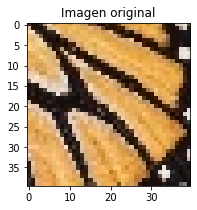

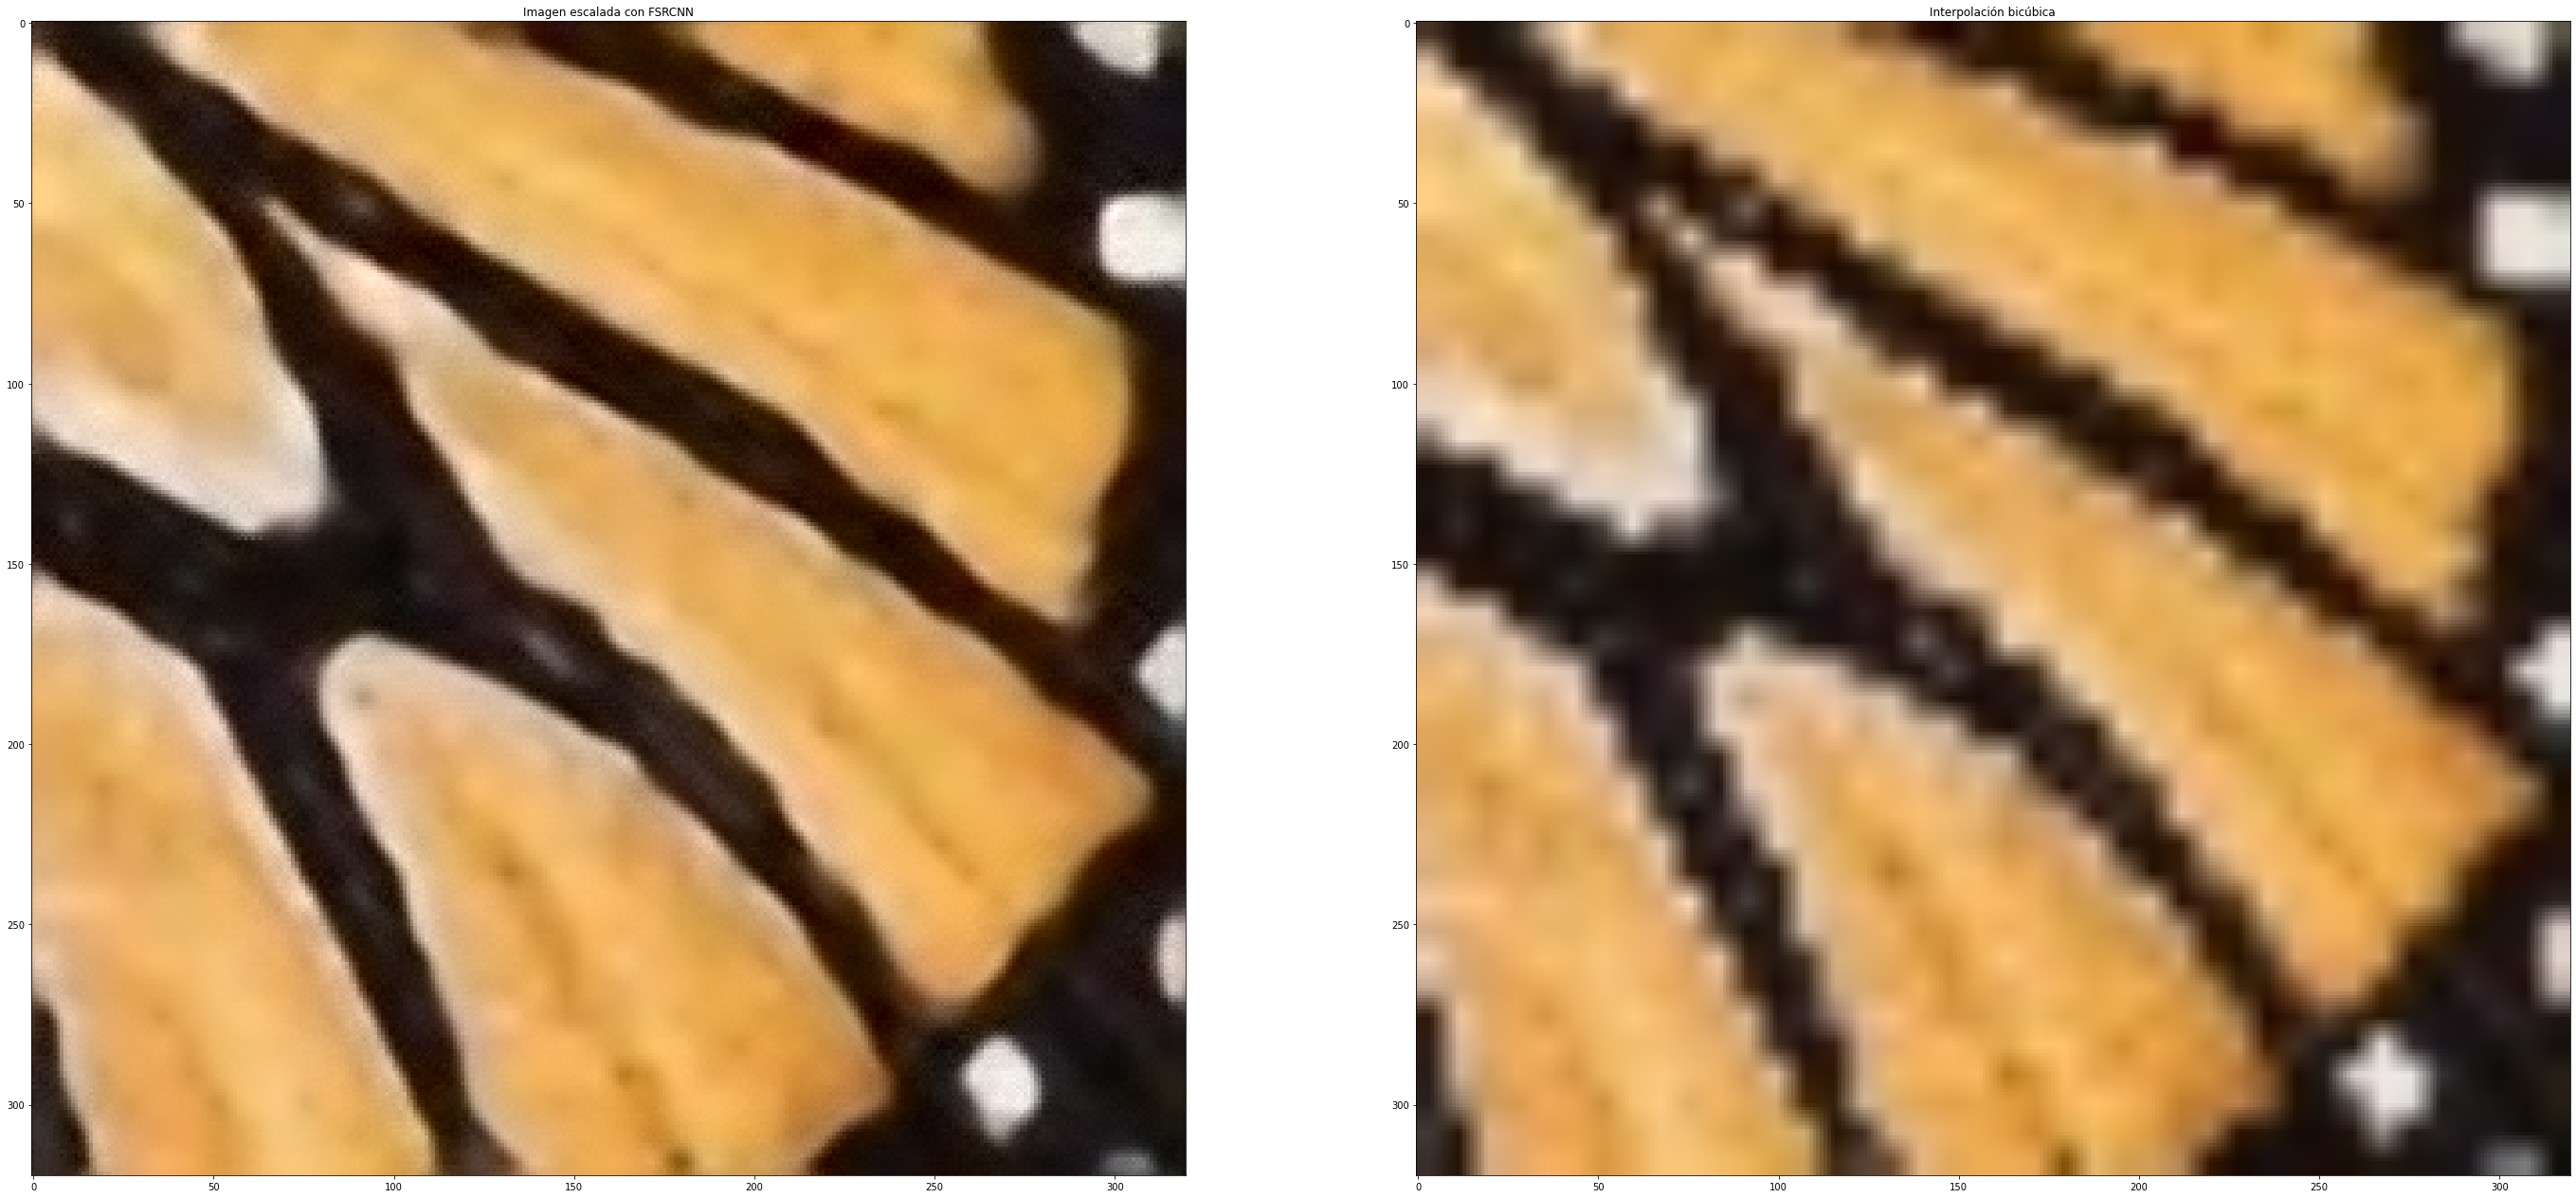

In [7]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "data_m4/models/LapSRN_x8.pb"
sr.readModel(path)
sr.setModel("lapsrn",8)
result = sr.upsample(img)
# Resized image
resized = cv2.resize(img,dsize=None,fx=8,fy=8)
# Original image
plt.figure(figsize=(3,3))
plt.imshow(img[:,:,::-1]), plt.title('Imagen original')
# Scaled images
plt.figure(figsize=(48,24))
plt.subplot(1,2,1)
# SR upscaled
plt.imshow(result[:,:,::-1]), plt.title('Imagen escalada con FSRCNN')
plt.subplot(1,2,2)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1]), plt.title('Interpolación bicúbica')
plt.show()

# Resultados

No es fácil diferenciar los resultados a simple vista según aumentamos la escala de las imágenes. Por ello, para validar el rendimiento del modelo, se aplican las técnicas anteriores a tres imágenes de prueba de $500 \times 333$. En primer lugar, las imágenes se reducen a la dimensión requerida, según el aumento que se pretenda implementar. Después, cada imagen se amplia con cada una de las técnicas para reconstruir una imagen similar a la original, de $500 \times 333$. Finalmente se compara la imagen original con la imagen reconstruida mediante dos métricas que definen la calidad de la reconstrucción de una imagen: el **PSNR** y **SSIM**. Los resultados medios de todas las imágenes se muestran a continuación, en primer lugar el promedio de **PSNR** medido en decibelios:

Name | 2x | 3x | 4x | 8x
   :-|:-: |:-: |:-: |-:
Bicubic|27.8667|25.9653|24.7637|21.5657
EDSR|28.5503|26.484|25.3513|
ESPCN|28.3803|25.9613|25.0947|–
FSRCNN|28.1673|26.128|25.0683|–
LapSRN|28.098|–|25.053|21.587

Para complementar la medida en la calidad de la reconstrucción, en la tabla siguiente se muestra el valor de la métrica **SSIM**:

Name | 2x | 3x | 4x | 8x
   :-|:-: |:-: |:-: |-:
Bicubic|0.859|0.794|0.728|0.552
EDSR|0.885|0.825|0.762|–
ESPCN|0.877|0.799|0.736|–
FSRCNN|0.876|0.798|0.735|–
LapSRN|0.874|–|0.735|0.554

Además, también se ha medido el tiempo de procesado promedio en todas las imágenes. Hay que tener en cuenta que el tamaño de la imagen ampliado a 3x es menor que el de 2x, de ahí la variación en cuanto al tiempo de procesado. En la tabla siguiente se muestra el tiempo de procesado promedio en segundos:

Name | 2x | 3x | 4x | 8x
   :-|:-: |:-: |:-: |-:
Bicubic|0.00099|0.00099|0.00098|0.00098
EDSR|32.501|16.718|10.224|–
ESPCN|0.049|0.032|0.018|–
FSRCNN|0.074|0.035|0.054|–
LapSRN|0.501|–|0.742|0.765


## Aplicaciones

La superresolución es una herramienta muy utilizada en películas de ciencia ficción o de crímenes, pero las aplicaciones reales se extienden a varios campos:

- Imágenes médicas: La superresolución es una solución para mejorar la calidad de las radiografías, los TAC, etc. Ayuda a resaltar detalles importantes sobre la información anatómica y funcional del cuerpo humano. La mejora de la resolución o la mejora de las imágenes médicas también ayuda a resaltar obstrucciones o tumores críticos.

<figure style="padding: 1em;"><center>
<img src="data_m4/figs/medical-imaging-super-resolution.jpg" width="800" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>Resultado de la superresolución de un solo fotograma en una imagen de la rodilla con un factor de aumento de 4x. Izquierda - imagen original en baja resolución, derecha - resultado de aplicar superresolución.
</center></figcaption>
</figure>

- Identificación biométrica: La superresolución puede desempeñar un papel crucial en el reconocimiento biométrico mediante la mejora de las imágenes de la cara, las huellas dactilares y el iris. La forma, la estructura y la textura se mejoran en gran medida, lo que ayuda a identificar claramente una huella biométrica.

- Teledetección: El concepto de utilizar la superresolución en la teledetección y las imágenes por satélite se ha desarrollado durante décadas. De hecho, la primera idea de la superresolución fue motivada por la necesidad de mejorar la calidad y la resolución de las imágenes de la superficie terrestre de los satélites **Landsat**.

- Imágenes de astronomía: La mejora de la resolución de las imágenes astronómicas ayuda a centrarse en detalles minúsculos que podrían convertirse en descubrimientos importantes en el espacio exterior. 

- Imágenes de vigilancia: Los sistemas de vigilancia y seguridad del tráfico desempeñan un papel muy importante. La aplicación de técnicas de superresolución en vídeos de baja resolución contribuye a identificar las infracciones de tráfico o de seguridad.

## Conclusión
En esta práctica hemos hecho una breve introducción al concepto de superresolución. Hemos elegido cuatro modelos de superresolución, hemos discutido su arquitectura y sus resultados, destacando su eficacia y la importancia de la superresolución en muchas aplicaciones.

# Preguntas

**La adquisición de las competencias asociadas a las prácticas requieren una explicación propia y rigurosa. Las copias y traducciones literales no demuestran la adquisición de las competencias, por tanto no se considerarán válidas (consultar la rúbrica).**



<div class="alert alert-success">
1. Describa los dos mecanismos que se usan en las redes neuronales para aumentar el tamaño de una imagen.
</div>

%%%% TO DO %%%%%

A la hora de aumentar el tamaño de una imagen empleando redes neuronales, existen dos métodos principales basados en el aumento de las dimensiones de una imágenes.

**Método 1**

El primer método es aplicar una convoculicón traspuesta. Siendo esta una convolución  transpuesta o deconvolucióncon. Esta se aplica sobre la imagnen de entrada, la cual hemos pasado previamente por un bloque "zero padding" y un proceso de upsampling. 

El "padding" nos agrega píxeles a la imagen. Al tratarse de un "Zero Padding", estos píxeles agregados están a cero.
El bloque upsampling nos permite aumentar las dimensiones de la imagen.

La combinación de estas tres etapas nos genera un aumento en las dimensiones de la matriz.

**Método 2**

El segundo método consiste en utilizar una capa denominada "subpixel". Esta capa realiza una serie de convoluciones a la imagen de entrada, generando una salida diferente por cada convolución.
Tras esto, se construye una matriz de mayor tamaño, sobre la cual vamos a añadir los elementos obtenidos a través de estas convoluciones. A esta combinación de convoluciones se le denomina pixel shuffle.


<div class="alert alert-success">
2. Para determinar la calidad de los métodos de superresolución se utilizan principalmente dos métricas, el PSNR y el SSIM. Describa brevemente su definición, sus características y su utilidad.
</div>

%%%% TO DO %%%%%

**PSNR** 
PSNR es un término "heredado" del campo del tratamiento de señales. Sus siglas significan "Relación Señal a Ruido de Pico " (del inglés Peak Signal-to-Noise Ratio). En este campo, es un valor empleado para poder definir la relacion entre la máxima energía posible de una señal y el ruido que afecta a su representación. Como suelen ser valores que en escala lineal no permiten hacer estudios cómodos, se tiende a expresar en dB.

En lo que a nosotros nos afecta, el PSNR mide precisamente la calidad de la reconstrucción de una imagen cuando tratamos de comprimir imágenes.

También lo medimos en dB, y suele tomar valores típicos en el intervalo [30, 50]dB.
Cuanto mayor sea este valor, mejor es la codificación hecha en la imagen, y por tanto presenta una mejor calidad. Por lo que a la hora de comparar un método se superrresolución con otro, aquel que tenga mayor PSNR prporcionará imágenes mas fidedignas a la original.


%%%% TO DO %%%%%

**SSIM**

El SSIM, o "medida del índice de similitud estructural" en español, es un método para predecir la calidad percibida de imágenes y videos digitales. Esta medida se emplea para cuantificar la similitud existente entre dos imágenes, siendo por tanto una métrica completa. Es decir, efectuamos esta medida comparando la imagen inicial sin comprimir, y la comparamos con la resultante tras haberla distorsionado o comprimido.

Esta medida es muy relevante, ya que considera la degradación de la imagen como un cambio producido en la información estructural. Incorporando fenómenos fundamentales de la percepción como lo es la intensidad y el contraste.

La principal diferencia que tiene esta medida con PSNR, es que PSNR estimaba errores absolutos, no hacía referencia a la información estructural de la imagen. Cosa que mide SSIM.

Esta métrica va de 0 a 1. Cuando más cercano a 1 sea, más fiel es la información estructural original y por tanto hay menos degradación en intensidad y contraste.

Es por esto que empleamos estas dos medidas para categoriar el rendimiento de los sistemas de superresolución. Para evaluar el nivel de error producido y medir la información estructural conservada tras aplicar los sistemas.


<div class="alert alert-success">
3. Según la pregunta anterior, ¿Por qué no es suficiente utilizar una sola métrica y utilizamos dos?
</div>

%%%% TO DO %%%%%

Como comenté al final de la pregunta anterior, necesitamos las dos métricas puesto que cada una se centra en un ascpecto del rendimiento.

El PSNR nos proporciona información relacionada con cómo de fidedigna es la imagen resultante con respecto a la original. Cosa que nos permite medir cuanto error cometemos. 

El SSIM nos proporciona la segunda cara de la moneda, y es que nos estimar cuanta degradación se ha producido en la imagen resultante.

Por lo que cuanto mayores sean estos valores, más se parecerá la imagen generada a la real, y menos degradación habremos sufrido en el proceso de superresolución.

<div class="alert alert-success">
4. Según los resultados de la práctica, ¿Cuál es el método más preciso? ¿Por qué?
</div>

%%%% TO DO %%%%%

Aplicando los criterios mencionados anteriormente, nos interesan métodos con alto PSNR y alto SSIM.

En base únicamente a la tabla que compara el PSNR, el método que mayor valor nos proporciona siempre es el EDSR, seguido por el ESPCN.

En base a la tabla del SSIM, la respuesta no es tan directa, puesto que el método con mayor SSIM en la columna "x2" no mantiene ese rendimiento en "x3". Lo que nos obliga a buscar un método que mantenga medianamente altos estos valores en las 3-4 columnas. O bien seleccionar el método que mejor se adapte a nuestra aplicación en concreto.

Sin embargo, en términos generales, podemos asegurar que EDSR presenta un buen rendimiento, a excepción de la columna 8, donde directamente no trabaja.

Como segundo candidato, la cosa está reñida entre ESPCN y FSRCNN, ya que varían ligeramente su rendimiento.

Tras este análisis, podemos "coronar" al método EDSR como el que mejor trabaja en aumentos de x2 a x4. Seguido de ESPCN (al tener mayor PSNR que FSRCNN es preferible su uso).

Si lo que buscamos es aplicar un aumento x8, tanto Bicubic como LapSRN presentan un rendimiento similar. Pero el de LapSRN es ligeramente superior. Por lo que es preferible este sobre el otro si no comparamos otros parámetros como el coste computacional o el tiempo de ejecución.

Ya que lo anteriormente dicho no tiene en cuenta el tiempo de procesado. Ya que precisamente EDSR presenta un tiempo de procesado notoriamente superior que los demás, por lo que deberíamos descartar su uso a menos que nos podamos permitir esto.

Por otro lado, ESPCN y FSRCNN tienen tiempos ce procesado bajos y relativamente similares, por lo que en términos generales el mejor es ESPCN para aumentos de x2 a x4. 

Mientras que para aumentos x8 nos interesa bicubic si queremos tiempos de procesado notoriamente bajos, o LapSRN si podemos tolerar tiempos de cómputo similares a los dados por el método ESPCN.


<div class="alert alert-success">
5. En una aplicación de vigilancia se requiere un funcionamiento en tiempo real y para ello se utiliza una cámara con imágenes de poca calidad. Para el funcionamiento en tiempo real, ¿Qué algoritmo utilizaría? ¿Cuál es la velocidad en FPS?
</div>

%%%% TO DO %%%%%

Como estamos hablando de una aplicación en tiempo real, los tiempos de procesado no pueden ser altos. 

Si a esto le sumamos que trabajamos con imágenes de poca calidad, debemos tener en cuenta que el método elegido nos proporcione un alto PSNR y SSIM para mantener la poca calidad de que disponemos.

Si agrupamos estas dos ideas, y consideramos que la cámara de seguridad necesita aumentos x2, x3 y como mucho x4, el candidato que mejor rendimiento nos dá es ESPCN.

Ya que su tiempo de procesado es el más bajado sin contar a bicubic, su SSIM alcanza 0.736 en su peor caso, y su PSNR toma valores de 28dB, 26dB y 25dB para cada aumento respectivamente.

Es decir, es un método "ágil" que respeta bastante la calidad de la imagen.

Aunque no podemos ignorar por completo a bicubic, ya que su PSNR y SSIM no varía tanto con respecto a ESPCN, y su tiempo de cómputo es dos ordenes de magnitud menor.

Sobre el papel no podríamos decidir rotundamente un método sobre el otro, sería interesante compararlos. 

Para calcular los FPS, simplemente debemos tener en cuenta que generamos una imagen cada "X" segundos, donde estos segundos son el valor de la tabla.

En base a esto, debemos calcular cuantas imágenes nos caben en un segundo. Ya que el resultado será los FPS.

**Tabla FPS**
Name | 2x | 3x | 4x | 8x
   :-|:-: |:-: |:-: |-:
Bicubic|1010 |1010|1020|1020
ESPCN|20|31|55| –
                       
En base a esta table, ESPCN quizá no es válido, al generar 20 FPS al efectuar un x2.

<div class="alert alert-success">
6. En aplicaciones de medicina, en ocasiones se requiere factores de ampliación muy grandes. De los algoritmos analizados, ¿Cuál es el algoritmo que tiene mayor capacidad de ampliación en un solo paso? ¿Cuál es su velocidad en FPS?
</div>

%%%% TO DO %%%%%

Los dos métodos que mayores ampliaciones pueden efectuar son el Bicubic anteriormente mencionado, y el LapSRN.

No obstante, LapSRN es bastante lento a la hora de procesarse. Siendo incapaz de generar más de un frame por segundo en el aumento x8.

Sin embargo, LapSRN es capaz de efectuar un aumento x4 sin necesidad de aplicar un x3. Lo que significa que es le método con mayor capacidad de ampliación en un único paso.


Name | 2x | 3x | 4x | 8x
   :-|:-: |:-: |:-: |-:
LapSRN|1 (casi 2) |-|1|1

<div class="alert alert-success">
7. De los algoritmos analizados, ¿Cuales tienen la etapa de interpolación al principio?, ¿cuales la tienen final?, ¿cuales realizan interpolación progresiva? Cuales son las ventajas e inconvenientes de cada uno de ellos.
</div>

%%%% TO DO %%%%%

Para poder analizar las ventajas e inconvenientes de aplicar la etapa de interpolación al inicio, al final o de forma progresiva, debemos estudiar cada caso por separado.

**Interpolación al inicio**

    En los métodos en que la interpolación se realiza al principio de la red, estamos estableciendo que el resto de la red refine el resultado hasta obtener la imagen de alta resolución.
    La contrapartida de esto, es que todas las operaciones de "refinamiento" se realizan a la máxima resolución. Lo cual nos genera un mayor coste computacional.

**Interpolación al final**

    Para evitar el problema de estar trabajando siempre con imágenes a máxima resolución, y por tanto tener altos costos computacionales, se recurrió a aplicar la interpolación al final de la red. Esto nos permite tener modelos mas eficientes computacionalmente hablando, pero trae como contrapartida el hecho de que suelen ser mas difícil de entrenar. Especialmente al tratar con grandes aumentos de resolución. 

**Interpolación intermedia**

    La interpolación intermedia no es ni mas ni menos que un compromiso entre estas dos soluciones. Cuanto más al inicio de la red se ubique, el modelo tendrá costes de computación más altos, pero tendrá mayor facilidad para ser entrenado. Mientras que cuanto más al final se ubique el efecto será el contrario.
 

En la red EDSR la interpolación se da al final de la red (aunque en realidad emplea unas conexiones de salto, por lo que podemos considerarlo una combinación mixta entre una interpolación intermedia y final). Esto lo podíamos preveer al no proporcionar valor para un aumento de x8. Cosa que se explica debido a la dificultas de entrenar a las redes en el aumento de imágenes de gran resolución.

Lo mísmo ocurre con la red ESPCN y FSRCN. Ya que estos modelos emplean la interpolación final. Y por tanto no es de extrañar que puedan alcanzar el aumento x8.

Sin embargo, LapSRN presenta una interpolación intermedia, cosa que le permite dar un salto en cuanto al valor del aumento, además de lograr el x8.

<div class="alert alert-success">
8. Se ha puesto de manifiesto que las técnicas basadas en deep learning generan mejores resultados que las tradicionales, ¿Por qué cree que sucede esto?
</div>

%%%% TO DO %%%%%

Las técnicas tradicionales generaban buenos rendimientos al tratar de generar aumentos no muy grandes. Y que al aumentar la resolución debemos generar y calcular nuevos píxeles, cosa que dificulta la extrapolación de estos métodos a grandes aumentos.

Sin embargo, gracias a que las redes neuronales consisten en hayar valores a base de "fuerza bruta" y cuya unión genera la implementación deseada, nos permite de una flexibilidad mucho más superior.

No es solo la flexibilidad, sino que los modelos son capaces de generalizar si se han entrenado correctamente. Por lo que actualmente no debemos abordar un problema matemáticamente e implementarlo en un algoritmo como en el caso tradicional, sufriendo las consecuencias que tiene esto, como el hecho de no poner aplciarse a grandes aumentos. Sino que ahora podemos "lanzar" una base de datos de imágenes, y con un modelo bien construido generar un método de lograr esto de forma generalizada.


Es decir, las redes neuronales nos abren un abanico de oportunidades que antes simplemente era imposible alcanzar. Ya que ahora no estás limitado a mapear tu problema a uno matemático, e implementarlo. Sino que ahora tu tarea es saber construir la topología de un modelo en función qué quieres que haga. 

<div class="alert alert-danger">
9. Pregunta avanzada

Investigue y describa el significado de la función de pérdidas utilizada para entrenar el método **LAPSRN**
</div>

%%%% TO DO %%%%%

En el modelo LapSRN, se toman mapas de características de resolución gruesa como entrada, se predicen los residuos de alta frecuencia y por último se emplean convoluciones transpuestas para aumentar la resolución.

La potencia de este modelo es que no requiere la interpolación bicúbica como paso de preprocesamiento, cosa que reduce drásticamente la complejidad computacional.

Otra cosa que hace de este modelo uno bastante certero, y es el tema de la pregunta, es su función de pérdidas. Y es que este modelo emplea la función de pérdida de Charbonnier, la cual es bastante robusta como para lograr una reconstrucción de alta calidad.

Esta función de pérdida se vuelvión popular en algunas tareas de estimación de flujo y profundidad donde se requiere de "robustez" estadística.  La pérdida de Charbonnier generalizada se basa en la función de pérdida de Charbonnier, que generalmente se define de la siguiente forma:

<img src="charbonier generalizada.PNG">

Esta función de pérdidas se denomina eventualmente como "L1-L2", ya que se comporta como una pérdida cuadrática cerca del origen y como una pérdida absoluta lejos del origen.

Conociendo la general, podemos entender que, la función de pérdida de Charbonnier generalizada toma la pérdida de Charbonnier y, en lugar de aplicar una raíz cuadrada, eleva la pérdida a un parámetro de potencia arbitrario denominado α. 

https://www.arxiv-vanity.com/papers/1701.03077/ [5]



